<a href="https://colab.research.google.com/github/Muhammad-Fauzan-Alfariz/Intel-Image-Classification/blob/main/Intel_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive"

 apparel-image-dataset
 apparel-image-dataset.zip
 apparel-images-dataset-category_only
 AXIS-WD346_V1
 AXIS-WD346_V1.jpg
'Cassava Leaf Disease Classification.ipynb'
'Colab Notebooks'
'Fashion Apparel Classification.ipynb'
 fashion-mnist-classification-using-cnns.ipynb
'Intel Image Classification.ipynb'
 intel_image.zip
 Salah.ipynb


In [4]:
# Ekstraksi file zip
import zipfile
local_zip ='drive/MyDrive/intel_image.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('drive/MyDrive/intel_image')
zip_ref.close()

In [5]:
def get_images(directory):
    # untuk menampung gambar
    Images = []
    # Untuk menampung label dari 0 - 5
    Labels = []
    
    label = 0
    for labels in os.listdir(directory):
        if labels == 'forest':
            label = 1
        elif labels == 'glacier':
            label = 2
        elif labels == 'mountain':
            label = 3
        elif labels == 'sea':
            label = 4
        elif labels == 'street':
            label = 5   
            
        for file_image in os.listdir(directory + labels):
            image = cv2.imread(directory+labels+r'/'+file_image) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [6]:
Images, Labels = get_images('drive/MyDrive/intel_image/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [7]:
print('Shape of Images : ',Images.shape)
print('Shape of Labels : ',Labels.shape)

Shape of Images :  (14034, 150, 150, 3)
Shape of Labels :  (14034,)


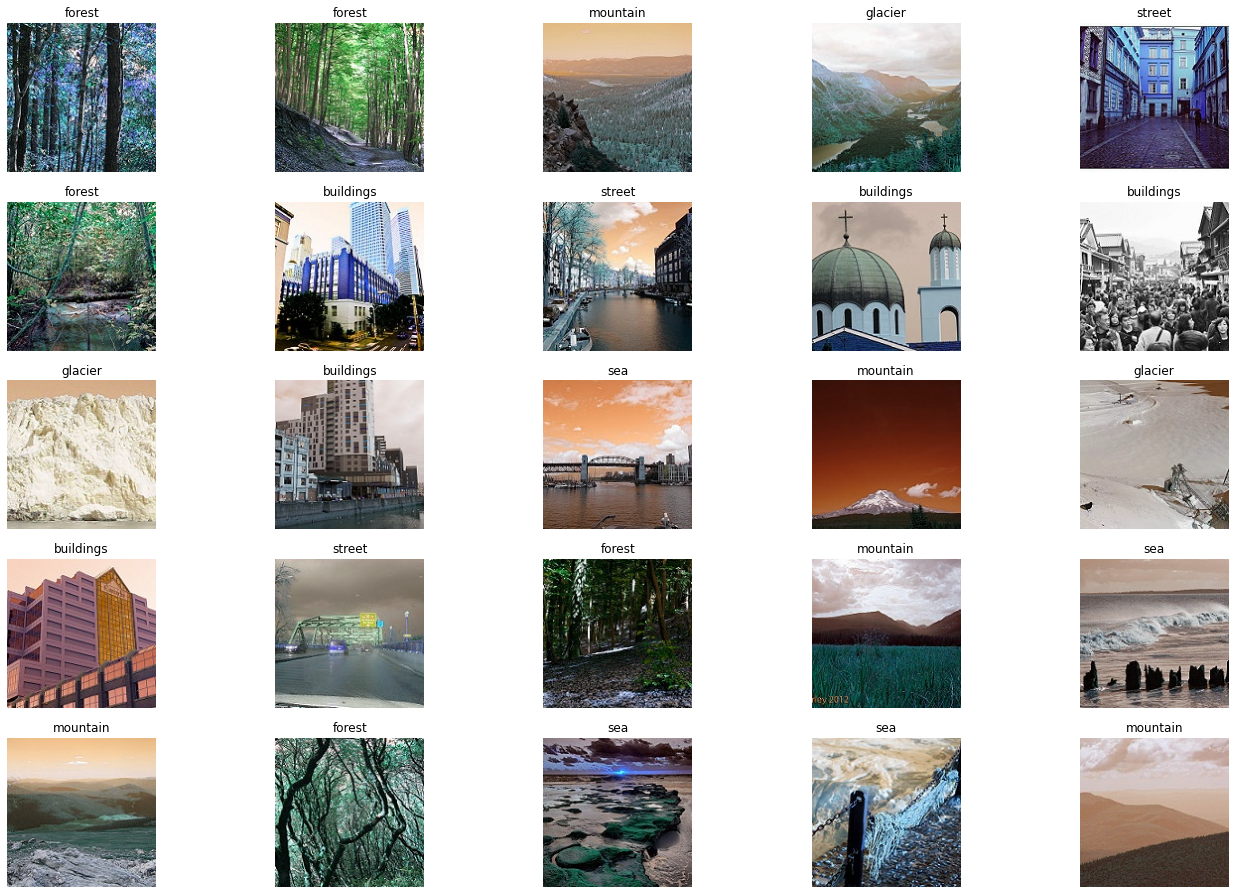

In [8]:
f,ax = plot.subplots(5,5)
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [9]:
import tensorflow.keras.models as Models
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.optimizers as Optimizer

model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

In [10]:
trained = model.fit(Images,Labels,epochs=35,validation_split=0.30)

Epoch 1/35
307/307 [==============================] - 91s 266ms/step - loss: 2.0969 - accuracy: 0.3044 - val_loss: 1.1482 - val_accuracy: 0.5467
Epoch 2/35
307/307 [==============================] - 84s 274ms/step - loss: 1.2840 - accuracy: 0.4850 - val_loss: 0.9522 - val_accuracy: 0.6469
Epoch 3/35
307/307 [==============================] - 86s 280ms/step - loss: 1.1000 - accuracy: 0.5807 - val_loss: 0.8410 - val_accuracy: 0.6932
Epoch 4/35
307/307 [==============================] - 88s 285ms/step - loss: 0.9466 - accuracy: 0.6560 - val_loss: 0.6723 - val_accuracy: 0.7537
Epoch 5/35
307/307 [==============================] - 88s 288ms/step - loss: 0.8316 - accuracy: 0.7065 - val_loss: 0.6919 - val_accuracy: 0.7374
Epoch 6/35
307/307 [==============================] - 89s 289ms/step - loss: 0.7779 - accuracy: 0.7305 - val_loss: 0.7779 - val_accuracy: 0.7200
Epoch 7/35
307/307 [==============================] - 89s 290ms/step - loss: 0.7319 - accuracy: 0.7467 - val_loss: 0.6459 - val_ac

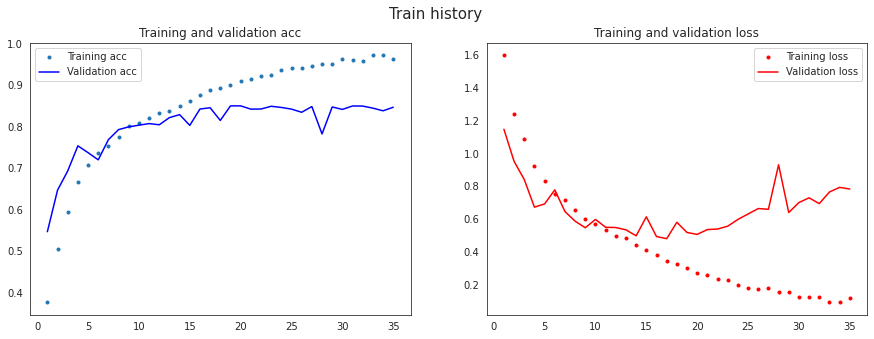

In [29]:
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns

acc = trained.history['accuracy']
val_acc = trained.history['val_accuracy']
loss = trained.history['loss']
val_loss = trained.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, ".", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, ".", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()

In [30]:
test_images,test_labels = get_images('drive/MyDrive/intel_image/seg_test/seg_test/')
test_images = np.array(test_images)
test_labels = np.array(test_labels)
evaluation = model.evaluate(test_images,test_labels, verbose=1)

94/94 [==============================] - 8s 83ms/step - loss: 0.7417 - accuracy: 0.8487


In [31]:
pred_images,no_labels = get_images('drive/MyDrive/intel_image/seg_pred/')
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


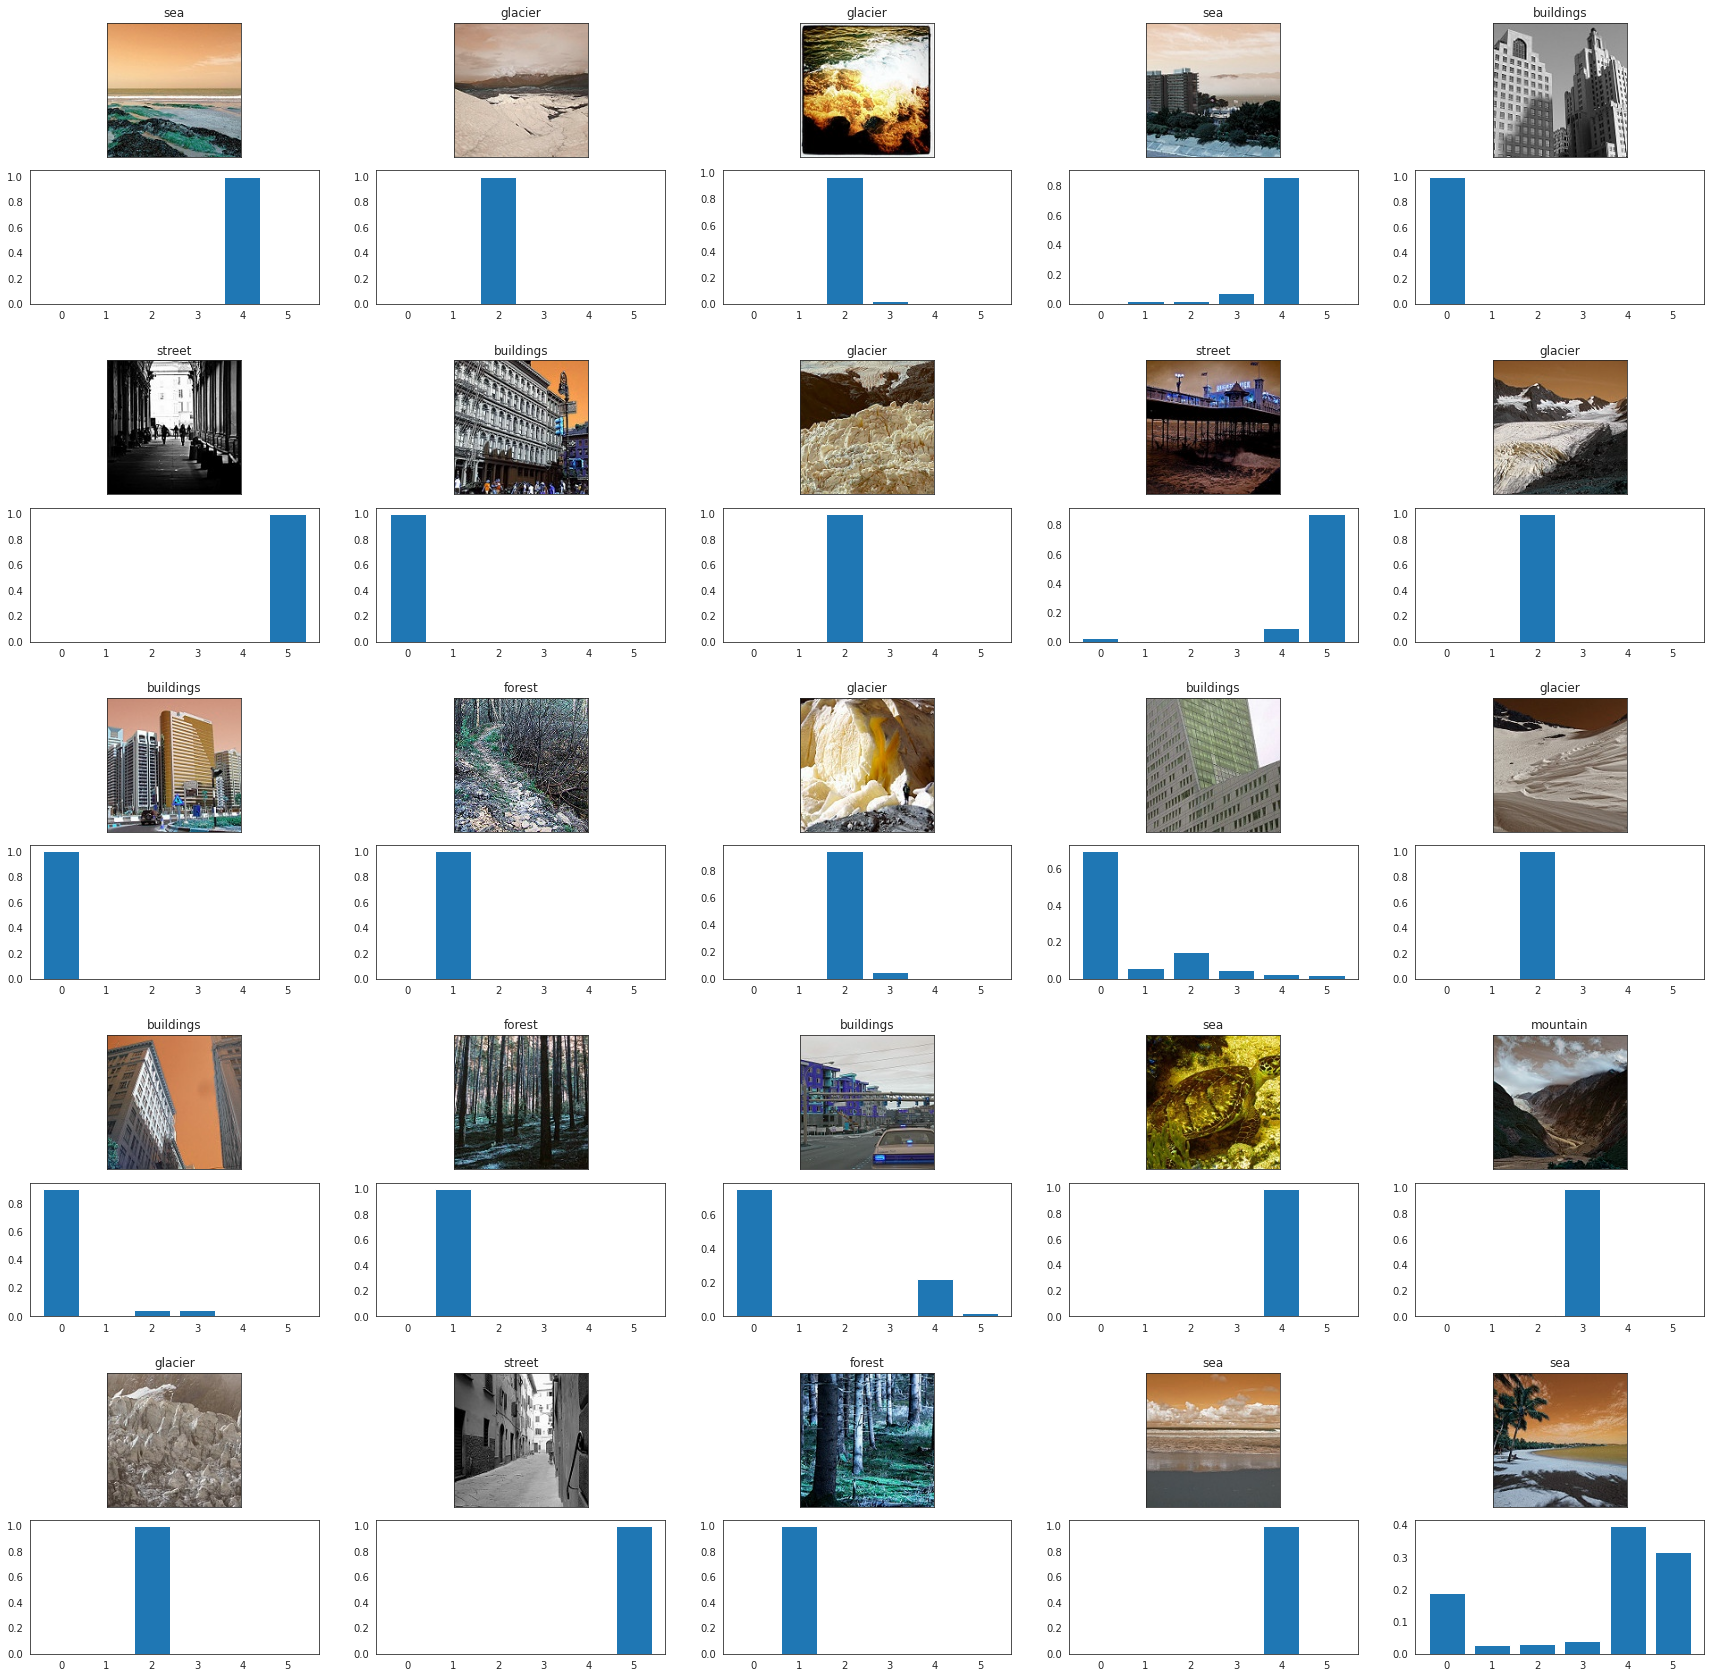

In [32]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()